#SARIMAX MODEL


Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA).

Here We have applied Sarimax model with monthly seasonality on Khammam District univariate AQI data provided by NASSCOM.


In [145]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Khammam'] = pd.to_numeric(df['Khammam'],errors='coerce')

# EDA

In [147]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad              object
Adilabad               object
Kuda, warangal          int64
Mee-Seva, Warangal      int64
Khammam               float64
Karimnagar              int64
dtype: object
Nizamabad             0
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               1
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

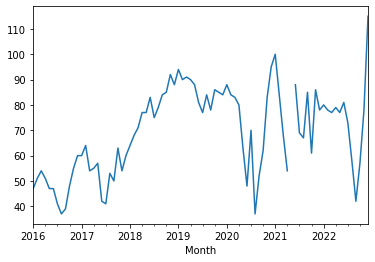

In [148]:
df["Khammam"].plot()

In [149]:
df['Khammam'] = df['Khammam'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

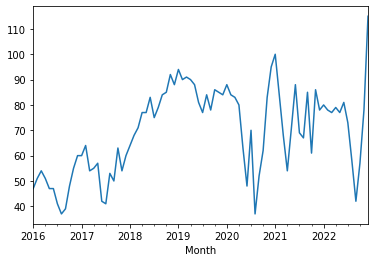

In [150]:
df["Khammam"].plot()

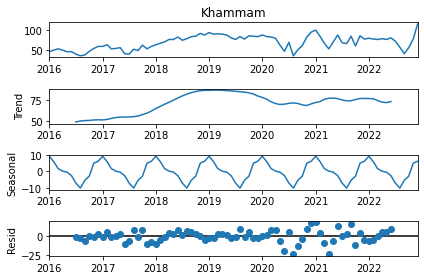

In [151]:
decompose_data = seasonal_decompose(df["Khammam"], model="additive")
decompose_data.plot();

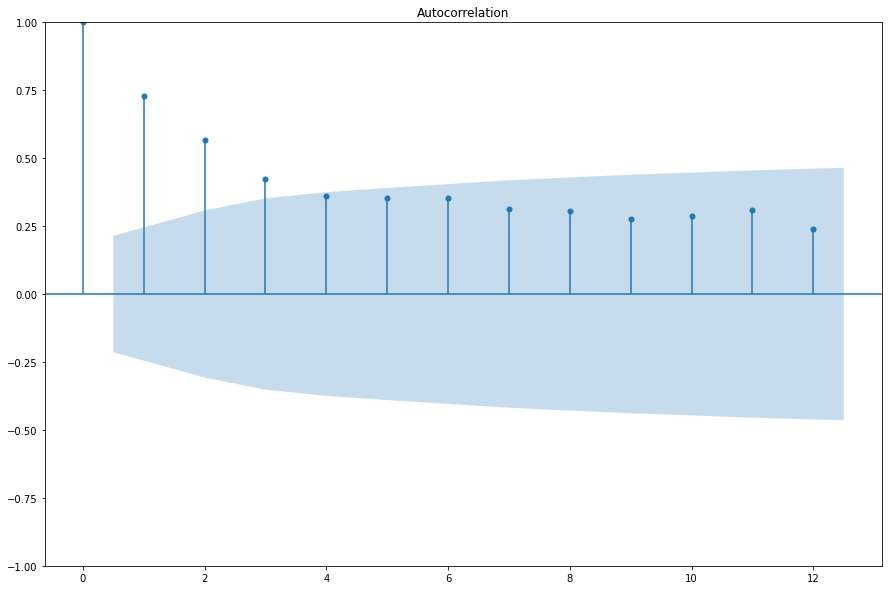

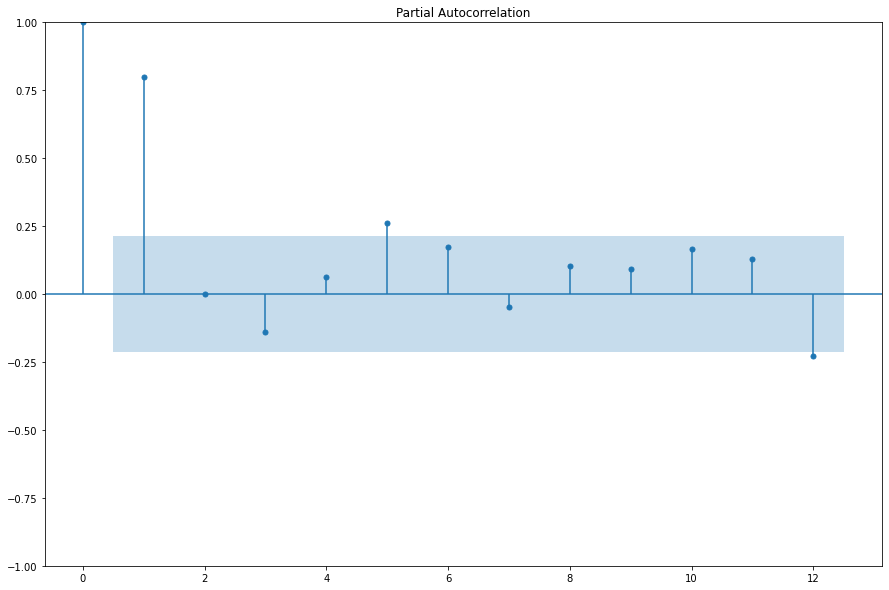

In [152]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
f_acf = plot_acf(df['Khammam'], lags=12)
f_pacf = plot_pacf(df['Khammam'], lags=12, method='ols')
f_acf.set_figheight(10)
f_acf.set_figwidth(15)
f_pacf.set_figheight(10)
f_pacf.set_figwidth(15)
plt.show()

# MODEL

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-153-7305a2df8261>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forecast']=results.predict(start=71,end=83,dynamic=True)


            Khammam   forecast
Month                         
2022-01-01     80.0  89.292632
2022-02-01     78.0  84.769058
2022-03-01     77.0  81.556110
2022-04-01     79.0  78.424558
2022-05-01     77.0  73.999597
2022-06-01     81.0  69.083724
2022-07-01     73.0  72.537160
2022-08-01     58.0  61.784718
2022-09-01     42.0  69.876616
2022-10-01     57.0  72.942429
2022-11-01     78.0  85.635383
2022-12-01    115.0  90.295583


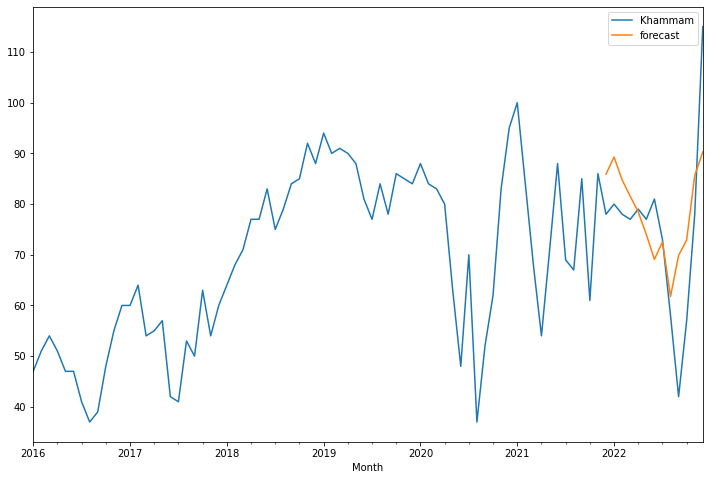

In [153]:
data = df[["Khammam"]]
model=sm.tsa.statespace.SARIMAX(df["Khammam"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=71,end=83,dynamic=True)
data[['Khammam','forecast']].plot(figsize=(12,8))
print(data.tail(12))

<AxesSubplot:>

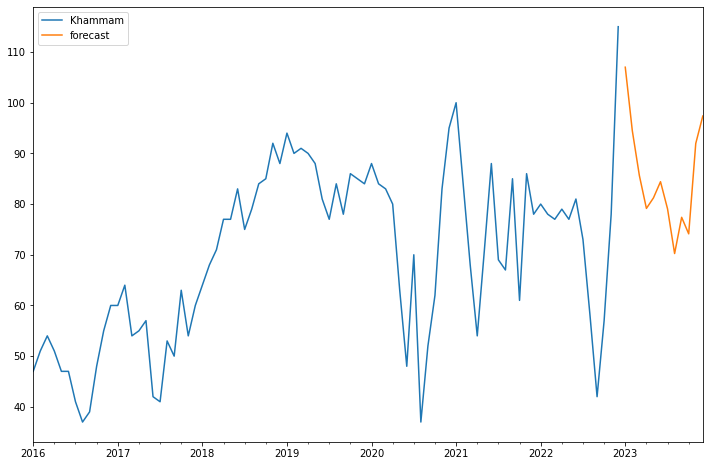

In [154]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=data.columns)
df5 = pd.concat([data,pred_date])
df5['forecast'] = results.predict(start = 84, end = 95, dynamic= True)  
df5[['Khammam', 'forecast']].plot(figsize=(12, 8))

# ERROR CALCULATION

In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(df["Khammam"].iloc[-12:], data["forecast"].iloc[-12:])),2)
mae = round(mean_absolute_error(df["Khammam"].iloc[-12:], data["forecast"].iloc[-12:]),2)
mape = mean_absolute_percentage_error(df["Khammam"].iloc[-12:], data["forecast"].iloc[-12:])
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 12.97
MAE  : 9.71
MAPE : 14.860009059899712%


The mean absolute percentage error is : 14.86%
So we discard this model for Karimnagar Data and move onto applying SARIMAX, Seasonal ETS and XGBoost with XAI.

In [156]:
df5["Khammam"][-12:]=df5["forecast"][-12:]
df_final = df5[["Khammam"]]

In [157]:
df_final.to_csv("Khammam_AQI_S.csv")